# Problem Statement
Heart disease is one of the leading causes of mortality worldwide, and early prediction can significantly reduce the risks through timely intervention. The goal of this project is to develop a machine learning model that predicts the 10-year risk of coronary heart disease (CHD) using patient demographic information (age, gender, education), lifestyle habits (smoking, BMI, diabetes), and clinical measurements (blood pressure, cholesterol, glucose levels). By analyzing these features, the model can support healthcare professionals in identifying high-risk individuals and enabling preventive measures.

# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
data = pd.read_csv("framingham.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Domain Analysis
* Domain: Healthcare / Medical Data Science
* Sub-domain: Cardiovascular Disease Prediction and Risk Assessment

* Problem Context: Cardiovascular diseases (CVDs) are the leading cause of death globally. Predicting the risk of heart disease helps in early intervention, lifestyle modification, and treatment planning.

* Data Characteristics:

  - Demographic features: Age, gender, education

  - Lifestyle features: Smoking habits, BMI, diabetes status

  - Clinical features: Blood pressure, cholesterol, glucose levels, heart rate

* Target Variable: TenYearCHD – a binary indicator representing whether a patient is likely to develop heart disease within 10 years.

# Basic Checks

In [3]:
# 1) print first 5 rows
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# 2) Changing column names
new_columns = {
    'currentSmoker': 'current_smoker',
    'cigsPerDay': 'cigs_per_day',
    'BPMeds': 'BP_medication',
    'prevalentStroke': 'prevalent_stroke',
    'prevalentHyp': 'prevalent_hypertensive',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_BP',
    'diaBP': 'diastolic_BP',
    'heartRate': 'heart_rate',
}

data.rename(columns=new_columns, inplace=True)
data

,male,age,education,current_smoker,cigs_per_day,BP_medication,prevalent_stroke,prevalent_hypertensive,diabetes,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
# 3) print last 5 rows
data.tail()

,male,age,education,current_smoker,cigs_per_day,BP_medication,prevalent_stroke,prevalent_hypertensive,diabetes,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [6]:
# 4) shape
data.shape

(4238, 16)

In [7]:
# 5) print all the columns
data.columns

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day',
       'BP_medication', 'prevalent_stroke', 'prevalent_hypertensive',
       'diabetes', 'total_cholesterol', 'systolic_BP', 'diastolic_BP', 'BMI',
       'heart_rate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
# 6) Check datatypes of each column
data.dtypes

male                        int64
age                         int64
education                 float64
current_smoker              int64
cigs_per_day              float64
BP_medication             float64
prevalent_stroke            int64
prevalent_hypertensive      int64
diabetes                    int64
total_cholesterol         float64
systolic_BP               float64
diastolic_BP              float64
BMI                       float64
heart_rate                float64
glucose                   float64
TenYearCHD                  int64
dtype: object

In [9]:
# 7) Check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   male                    4238 non-null   int64  
 1   age                     4238 non-null   int64  
 2   education               4133 non-null   float64
 3   current_smoker          4238 non-null   int64  
 4   cigs_per_day            4209 non-null   float64
 5   BP_medication           4185 non-null   float64
 6   prevalent_stroke        4238 non-null   int64  
 7   prevalent_hypertensive  4238 non-null   int64  
 8   diabetes                4238 non-null   int64  
 9   total_cholesterol       4188 non-null   float64
 10  systolic_BP             4238 non-null   float64
 11  diastolic_BP            4238 non-null   float64
 12  BMI                     4219 non-null   float64
 13  heart_rate              4237 non-null   float64
 14  glucose                 3850 non-null   

In [10]:
# 8) find unique values in the target
data.TenYearCHD.unique()

array([0, 1], dtype=int64)

In [11]:
# 9) find count of True and False values
data.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [12]:
# 10) statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
current_smoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigs_per_day,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BP_medication,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalent_stroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalent_hypertensive,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
total_cholesterol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


Insights:-
* Both men and women are included, with a slightly larger proportion of females.
* The participants are generally middle-aged to older adults, covering a wide risk-prone age range.
* Education levels vary, showing diversity in socio-economic background, which can indirectly affect lifestyle choices and health.
* Smoking is fairly common, with a portion of individuals smoking heavily, making it a critical lifestyle factor to consider.
* Only a small fraction of patients are on blood pressure medication or have experienced stroke, but hypertension itself is more widely observed.
* Diabetes is relatively rare in this sample, though extreme glucose values suggest that a few cases may represent uncontrolled conditions.
* Cholesterol levels tend to be higher than normal, with some patients showing very extreme values, indicating strong outliers.
* Blood pressure readings suggest that many individuals may already fall into pre-hypertension or hypertension categories.
* Body mass index values point toward an overall trend of being overweight, which is a significant contributor to heart disease.
* Heart rate and glucose values show considerable variation, with certain individuals showing unusual extremes.
* The outcome variable (TenYearCHD) indicates that only a minority of participants are likely to develop heart disease, making the dataset imbalanced and requiring special care during model training.


In [13]:
# 10) Check for missing values
data.isnull().sum()

male                        0
age                         0
education                 105
current_smoker              0
cigs_per_day               29
BP_medication              53
prevalent_stroke            0
prevalent_hypertensive      0
diabetes                    0
total_cholesterol          50
systolic_BP                 0
diastolic_BP                0
BMI                        19
heart_rate                  1
glucose                   388
TenYearCHD                  0
dtype: int64

# Exploratory Data Analysis
 ### a) Univariate Analysis- 

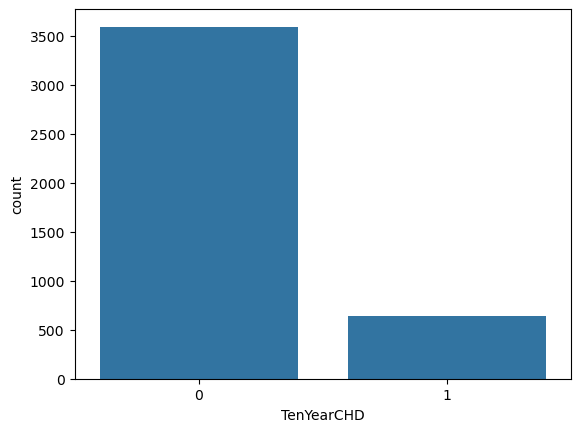

In [14]:
# 1) check whether data is balanced or not
sns.countplot(x=data.TenYearCHD)
plt.show()

Clearly the data is imbalanced since we have more records related to patients who will not have CHD risk and less patients who will have it.

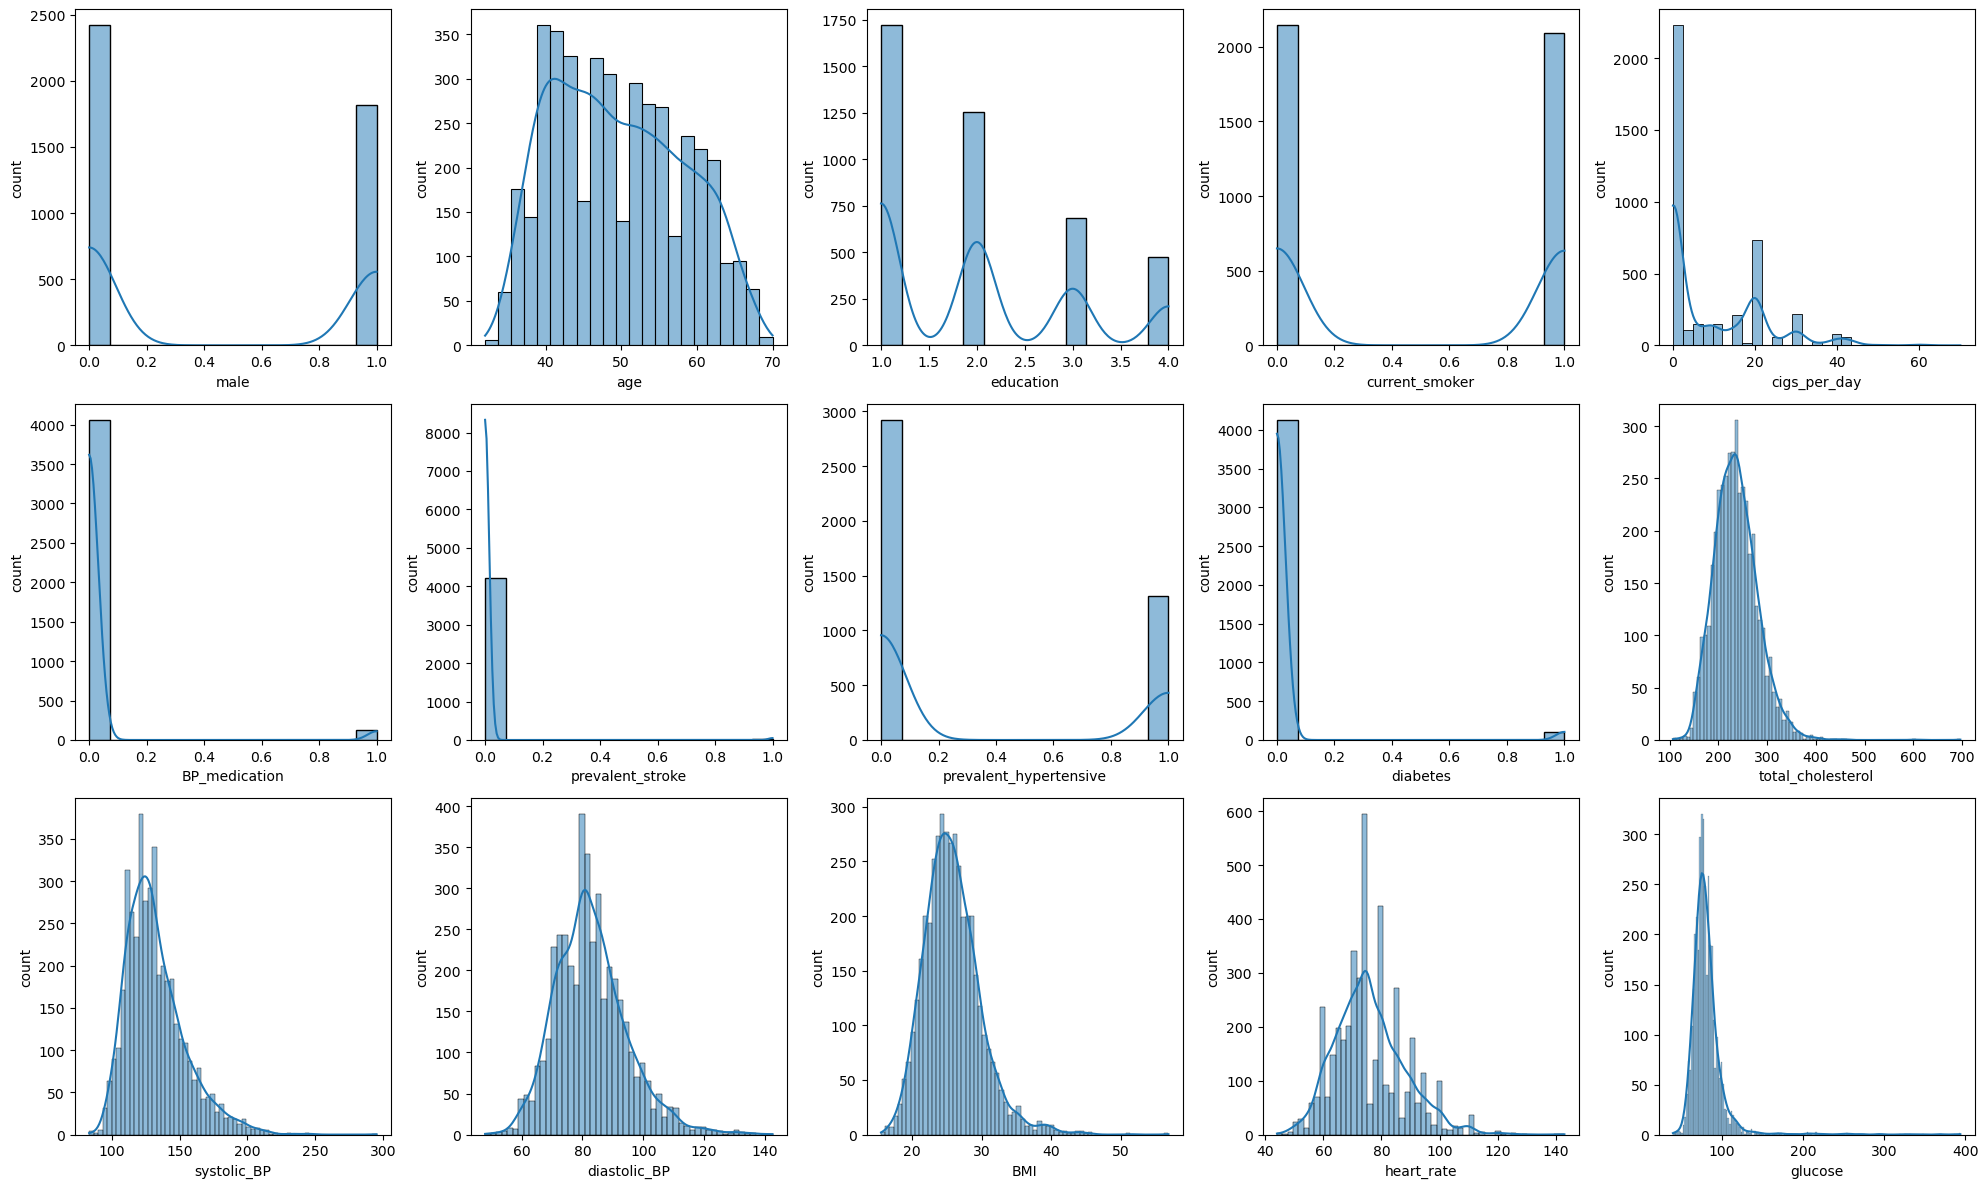

In [15]:
# 2) Check for distribution of data

plt.figure(figsize=(20,12), facecolor='white')
plotnumber = 1

for column in data.drop('TenYearCHD', axis=1):
    if plotnumber <= 15:
        ax = plt.subplot(3,5, plotnumber)
        sns.histplot(x=data[column], kde=True)

        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

* **Nearly Normal:** Age, systolic BP, diastolic BP, BMI, heart rate.
* **Skewed:** Cigarettes per day (right-skewed), cholesterol (right-skewed), glucose (heavily right-skewed).
* **Categorical/Binary:** Gender, education, BP meds, stroke, diabetes, hypertension → not expected to follow normal distribution.

### b) Bivariate Analysis-

In [16]:
data2 = data.copy()

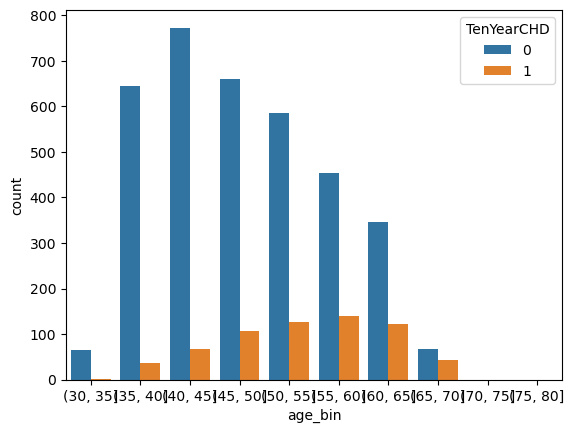

In [17]:
data2['age_bin'] = pd.cut(data2['age'], bins=range(30, 81, 5))
sns.countplot(data=data2, x='age_bin', hue='TenYearCHD')
plt.show()

Insights:-
* People in the age group between 55-65 tends to be at high risk.

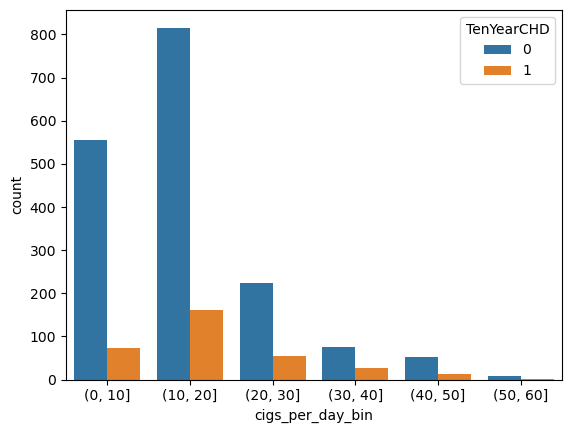

In [18]:
data2['cigs_per_day_bin'] = pd.cut(data2['cigs_per_day'], bins=range(0, 70, 10))
sns.countplot(data=data2, x='cigs_per_day_bin', hue='TenYearCHD')
plt.show()

Insights:-
* The vast majority of the population, including most heart disease cases, are in the lowest smoking bin (0-20 cigs/day). 
* This suggests that while smoking is a risk factor, non-smokers and light smokers still make up a large portion of those who develop heart disease.

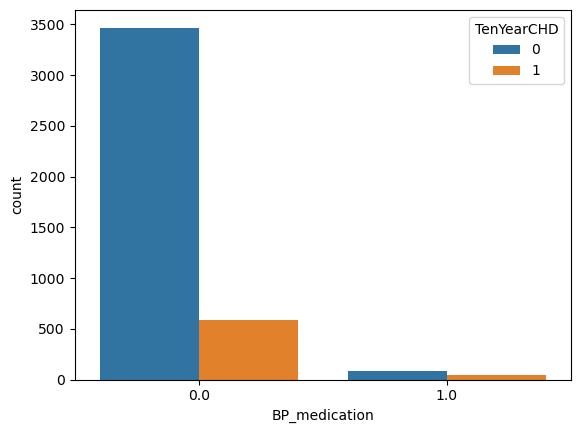

In [19]:
sns.countplot(data=data2, x='BP_medication', hue='TenYearCHD')
plt.show()

Insights:-
* A significantly larger number of people not on medication developed heart disease. 
* However, this is likely because the vast majority of the total sample is not on medication. 

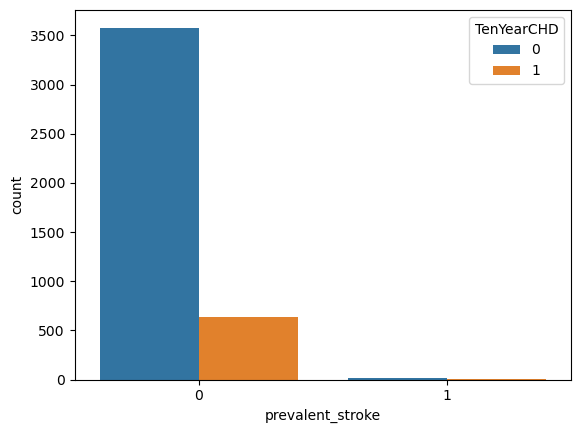

In [20]:
sns.countplot(data=data2, x='prevalent_stroke', hue='TenYearCHD')
plt.show()

Insights:-
* An overwhelming majority of the sample has no history of stroke. T
* he count of heart disease cases is much higher in the "no stroke" group simply because that group is so much larger.

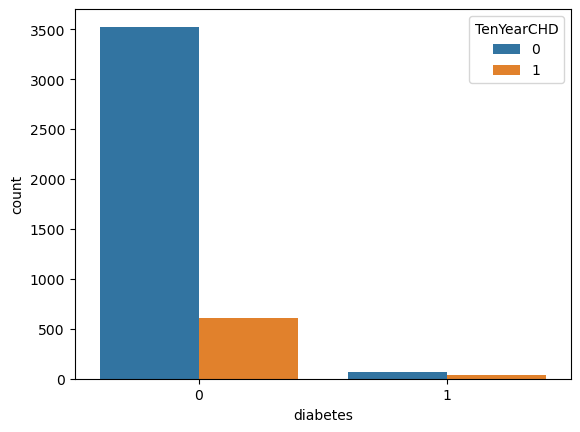

In [21]:
sns.countplot(data=data2, x='diabetes', hue='TenYearCHD')
plt.show()

Insights:-
* Similar to stroke, most of the sample does not have diabetes. 
* The total count of heart disease cases is higher in non-diabetics.

<Axes: xlabel='systolic_BP', ylabel='diastolic_BP'>

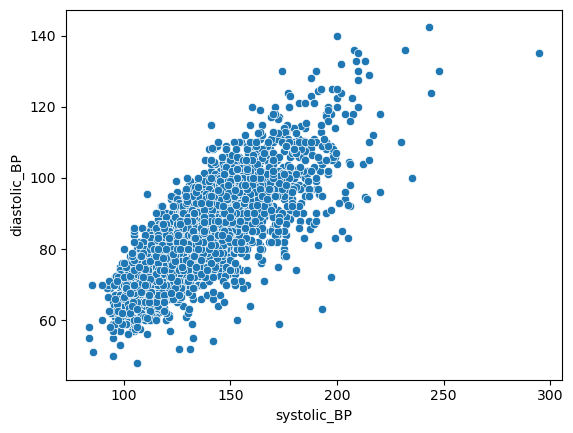

In [22]:
sns.scatterplot(x="systolic_BP", y="diastolic_BP", data=data)

Insights:-
* This scatterplot shows the expected strong positive correlation between systolic and diastolic blood pressure. 
* The data forms a clear cloud along a diagonal line.

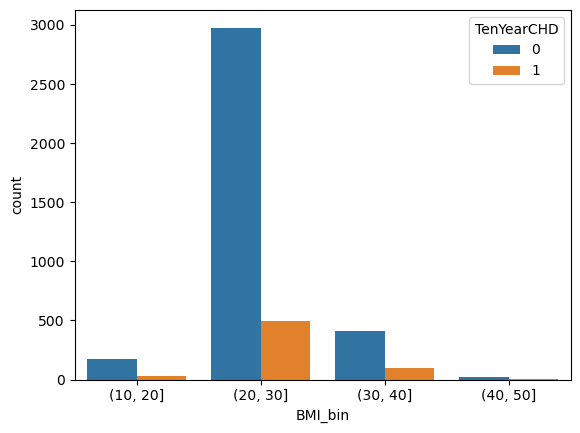

In [23]:
data2['BMI_bin'] = pd.cut(data2['BMI'], bins=range(10, 60, 10))
sns.countplot(data=data2, x='BMI_bin', hue='TenYearCHD')
plt.show()

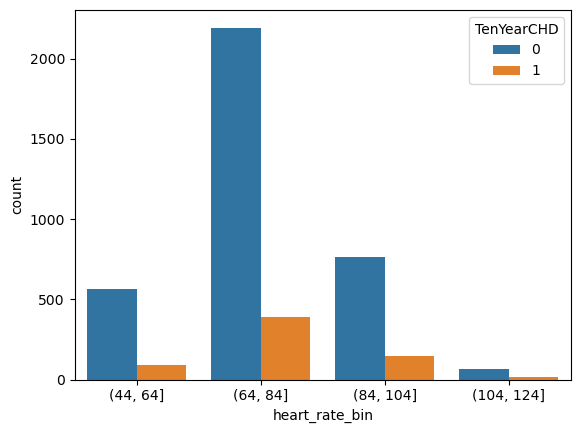

In [24]:
data2['heart_rate_bin'] = pd.cut(data2['heart_rate'], bins=range(44, 144, 20))
sns.countplot(data=data2, x='heart_rate_bin', hue='TenYearCHD')
plt.show()

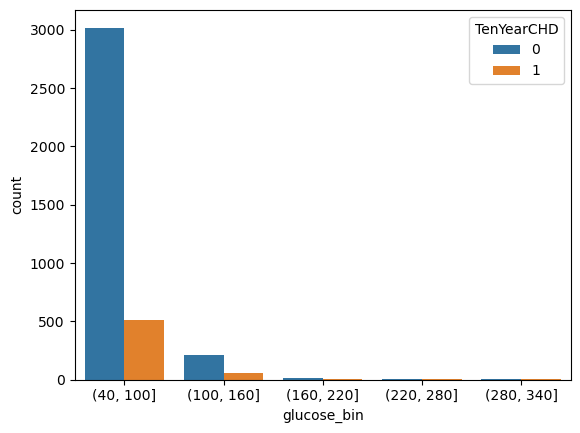

In [25]:
data2['glucose_bin'] = pd.cut(data2['glucose'], bins=range(40, 400, 60))
sns.countplot(data=data2, x='glucose_bin', hue='TenYearCHD')
plt.show()

# Data Preprocessing

In [26]:
# 1) check for missing values and handle them
data.isnull().sum()

male                        0
age                         0
education                 105
current_smoker              0
cigs_per_day               29
BP_medication              53
prevalent_stroke            0
prevalent_hypertensive      0
diabetes                    0
total_cholesterol          50
systolic_BP                 0
diastolic_BP                0
BMI                        19
heart_rate                  1
glucose                   388
TenYearCHD                  0
dtype: int64

In [27]:
data['education'] = data['education'].fillna(data['education'].median())
data['cigs_per_day'] = data['cigs_per_day'].fillna(data['cigs_per_day'].median())
data['BP_medication'] = data['BP_medication'].fillna(data['BP_medication'].median())
data['total_cholesterol'] = data['total_cholesterol'].fillna(data['total_cholesterol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heart_rate'] = data['heart_rate'].fillna(data['heart_rate'].median())
data['glucose'] = data['glucose'].fillna(data['glucose'].median())

In [28]:
data.isnull().sum()

male                      0
age                       0
education                 0
current_smoker            0
cigs_per_day              0
BP_medication             0
prevalent_stroke          0
prevalent_hypertensive    0
diabetes                  0
total_cholesterol         0
systolic_BP               0
diastolic_BP              0
BMI                       0
heart_rate                0
glucose                   0
TenYearCHD                0
dtype: int64

In [29]:
# 2) check for duplicate values
data.duplicated().sum()

0

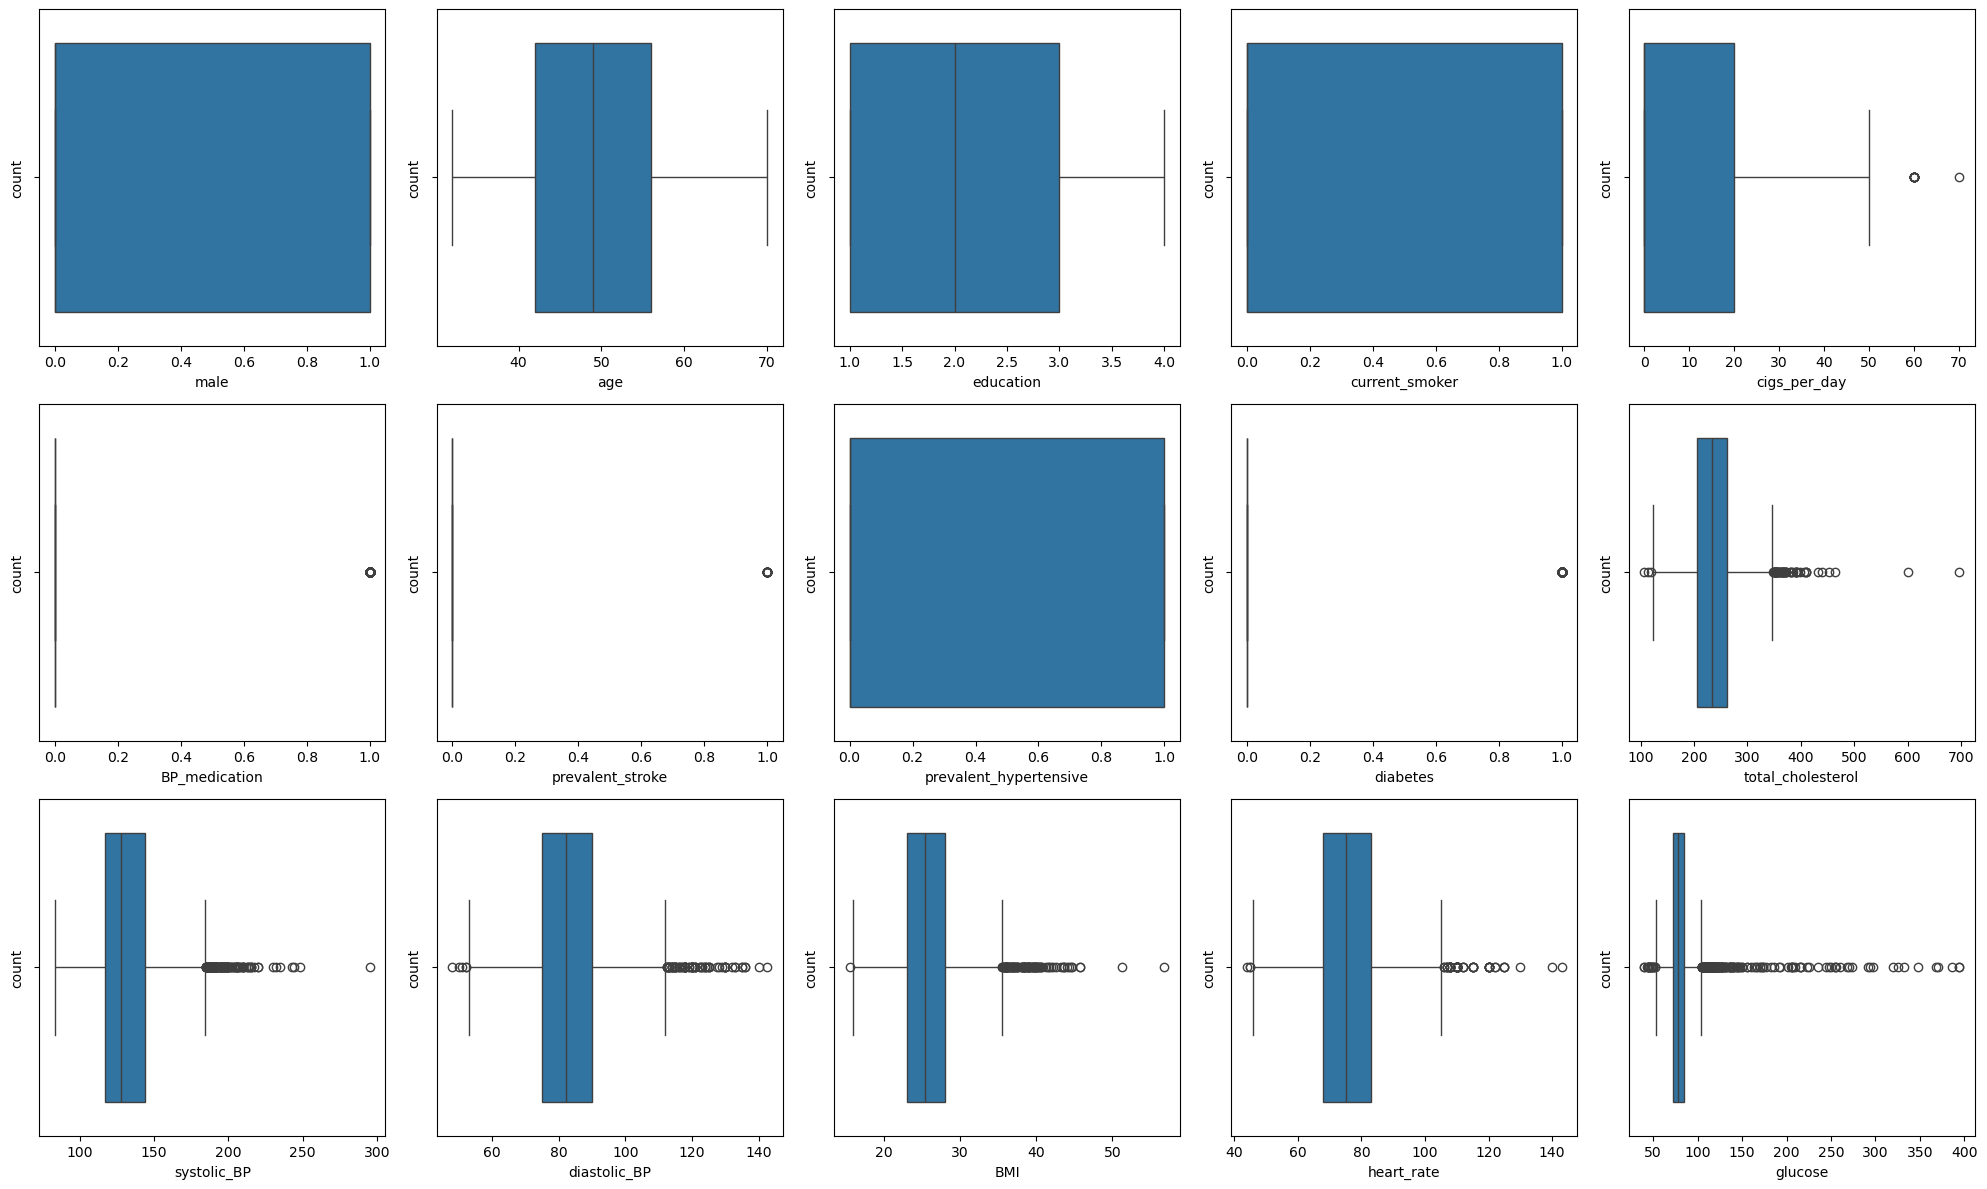

In [30]:
# 3) check for outliers
plt.figure(figsize=(20,12), facecolor='white')
plotnumber = 1

for column in data.drop('TenYearCHD', axis=1):
    if plotnumber <= 15:
        ax = plt.subplot(3,5, plotnumber)
        sns.boxplot(x=data[column])

        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [31]:
# (a) Handle Outliers in cigs_per_day
# Find Q1, Q3 of cigs_per_day

Q1 = data['cigs_per_day'].quantile(0.25) # 1/4th value
print("Lower Quartile: ", Q1)
Q3 = data['cigs_per_day'].quantile(0.75) # 3/4th value
print("Upper Quartile: ", Q3)

Lower Quartile:  0.0
Upper Quartile:  20.0


In [32]:
# Find IQR
IQR = Q3-Q1
IQR

20.0

In [33]:
lower_limit = Q1-1.5*IQR
print("Lower Limit: ", lower_limit)
upper_limit = Q3+1.5*IQR
print("Upper Limit: ", upper_limit)

Lower Limit:  -30.0
Upper Limit:  50.0


In [34]:
# Find values above Upper Limit
data.loc[data['cigs_per_day'] > upper_limit]

,male,age,education,current_smoker,cigs_per_day,BP_medication,prevalent_stroke,prevalent_hypertensive,diabetes,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose,TenYearCHD
327,1,56,1.0,1,60.0,0.0,0,0,0,246.0,125.0,79.0,29.64,70.0,85.0,0
721,1,59,1.0,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0
1054,1,58,2.0,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0
1452,1,39,1.0,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0
1468,1,50,1.0,1,60.0,0.0,0,1,0,340.0,134.0,95.0,30.46,85.0,86.0,0
1488,1,37,4.0,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0
1849,1,48,1.0,1,60.0,0.0,0,0,0,252.0,104.0,73.5,23.03,70.0,77.0,0
2709,1,46,1.0,1,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.0,0
2710,1,49,2.0,1,60.0,0.0,0,0,0,213.0,123.0,75.0,24.84,70.0,78.0,1
3008,1,40,3.0,1,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0


In [35]:
len(data.loc[data['cigs_per_day'] > upper_limit])/len(data)

0.002831524303916942

less than 5%

In [36]:
# Find values below lower limit
data.loc[data['cigs_per_day'] < lower_limit]

,male,age,education,current_smoker,cigs_per_day,BP_medication,prevalent_stroke,prevalent_hypertensive,diabetes,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose,TenYearCHD


In [37]:
data.loc[data['cigs_per_day'] > upper_limit, "cigs_per_day"] = data['cigs_per_day'].median()

In [38]:
# (b) Handle Outliers in total_cholesterol
# Find Q1, Q3 of total_cholesterol

Q1 = data['total_cholesterol'].quantile(0.25)
Q3 = data['total_cholesterol'].quantile(0.75)

# Find IQR
IQR = Q3-Q1
IQR

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [39]:
print(data.loc[data['total_cholesterol'] > upper_limit])
print(len(data.loc[data['total_cholesterol'] > upper_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
194      0   42        3.0               0           0.0            0.0   
259      0   60        1.0               0           0.0            0.0   
333      0   55        2.0               0           0.0            1.0   
533      0   53        2.0               0           0.0            0.0   
543      1   47        2.0               1          18.0            0.0   
617      0   51        3.0               1           3.0            0.0   
670      0   65        2.0               0           0.0            0.0   
920      0   60        1.0               1          15.0            0.0   
926      1   61        1.0               1          20.0            0.0   
998      0   57        1.0               0           0.0            0.0   
1103     0   60        4.0               1          20.0            0.0   
1111     0   52        2.0               0           0.0            0.0   
1150     0   46        1.

In [40]:
print(data.loc[data['total_cholesterol'] < lower_limit])
print(len(data.loc[data['total_cholesterol'] < lower_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
1624     0   70        1.0               0           0.0            0.0   
2525     1   38        1.0               1          20.0            0.0   
4066     1   47        2.0               1          20.0            0.0   

      prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
1624                 1                       1         0              107.0   
2525                 0                       0         0              113.0   
4066                 0                       0         0              119.0   

      systolic_BP  diastolic_BP    BMI  heart_rate  glucose  TenYearCHD  
1624        143.0          93.0  25.40        68.0     62.0           1  
2525        120.0          83.5  30.34        78.0     85.0           0  
4066        117.0          78.5  26.40        75.0     78.0           0  
0.0007078810759792355


less than 5% 

In [41]:
data.loc[data['total_cholesterol'] > upper_limit, "total_cholesterol"] = data['total_cholesterol'].median()
data.loc[data['total_cholesterol'] < lower_limit, "total_cholesterol"] = data['total_cholesterol'].median()

In [42]:
# (c) Handle Outliers in systolic_BP
# Find Q1, Q3 of systolic_BP

Q1 = data['systolic_BP'].quantile(0.25)
Q3 = data['systolic_BP'].quantile(0.75)

# Find IQR
IQR = Q3-Q1
IQR

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [43]:
print(data.loc[data['systolic_BP'] > upper_limit])
print(len(data.loc[data['systolic_BP'] > upper_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
44       0   53        3.0               0           0.0            1.0   
66       0   62        1.0               0           0.0            0.0   
87       0   61        2.0               1           1.0            0.0   
108      0   66        1.0               0           0.0            0.0   
153      0   66        1.0               0           0.0            0.0   
...    ...  ...        ...             ...           ...            ...   
4123     1   51        3.0               0           0.0            0.0   
4173     0   54        2.0               0           0.0            0.0   
4193     0   63        1.0               0           0.0            0.0   
4222     1   53        3.0               0           0.0            0.0   
4228     0   50        1.0               0           0.0            0.0   

      prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
44                  

less than 5%

In [44]:
print(data.loc[data['systolic_BP'] < lower_limit])
print(len(data.loc[data['systolic_BP'] < lower_limit])/len(data))

Empty DataFrame
Columns: [male, age, education, current_smoker, cigs_per_day, BP_medication, prevalent_stroke, prevalent_hypertensive, diabetes, total_cholesterol, systolic_BP, diastolic_BP, BMI, heart_rate, glucose, TenYearCHD]
Index: []
0.0


In [45]:
data.loc[data['systolic_BP'] > upper_limit, "systolic_BP"] = data['systolic_BP'].median()

In [46]:
# (d) Handle Outliers in diastolic_BP
# Find Q1, Q3 of diastolic_BP

Q1 = data['diastolic_BP'].quantile(0.25)
Q3 = data['diastolic_BP'].quantile(0.75)

# Find IQR
IQR = Q3-Q1
IQR

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [47]:
print(data.loc[data['diastolic_BP'] > upper_limit])
print(len(data.loc[data['diastolic_BP'] > upper_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
28       0   61        3.0               0           0.0            0.0   
46       0   65        1.0               0           0.0            0.0   
158      0   49        3.0               0           0.0            1.0   
249      0   60        1.0               1          20.0            0.0   
407      0   46        2.0               0           0.0            0.0   
...    ...  ...        ...             ...           ...            ...   
4075     1   63        4.0               1          25.0            0.0   
4076     0   61        1.0               0           0.0            1.0   
4123     1   51        3.0               0           0.0            0.0   
4173     0   54        2.0               0           0.0            0.0   
4228     0   50        1.0               0           0.0            0.0   

      prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
28                  

In [48]:
print(data.loc[data['diastolic_BP'] < lower_limit])
print(len(data.loc[data['diastolic_BP'] < lower_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
1924     0   44        3.0               1          20.0            0.0   
1997     0   58        1.0               0           0.0            0.0   
3328     1   48        3.0               0           0.0            0.0   
3641     0   58        1.0               0           0.0            0.0   
3645     1   68        1.0               1          15.0            0.0   

      prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
1924                 0                       0         0              245.0   
1997                 0                       0         1              260.0   
3328                 0                       0         0              175.0   
3641                 0                       0         0              240.0   
3645                 0                       0         0              157.0   

      systolic_BP  diastolic_BP    BMI  heart_rate  glucose  TenYearCHD  


less than 5%

In [49]:
data.loc[data['diastolic_BP'] > upper_limit, "diastolic_BP"] = data['diastolic_BP'].median()
data.loc[data['diastolic_BP'] < lower_limit, "diastolic_BP"] = data['diastolic_BP'].median()

In [50]:
# (e) Handle Outliers in BMI
# Find Q1, Q3 of BMI

Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)

# Find IQR
IQR = Q3-Q1
IQR

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [51]:
print(data.loc[data['BMI'] > upper_limit])
print(len(data.loc[data['BMI'] > upper_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
35       1   37        2.0               0           0.0            0.0   
37       1   52        1.0               0           0.0            0.0   
78       0   45        1.0               0           0.0            0.0   
87       0   61        2.0               1           1.0            0.0   
108      0   66        1.0               0           0.0            0.0   
...    ...  ...        ...             ...           ...            ...   
4001     0   58        1.0               0           0.0            0.0   
4132     0   57        1.0               0           0.0            0.0   
4190     0   41        1.0               0           0.0            0.0   
4215     0   63        1.0               0           0.0            0.0   
4228     0   50        1.0               0           0.0            0.0   

      prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
35                  

less than 5%

In [52]:
print(data.loc[data['BMI'] < lower_limit])
print(len(data.loc[data['BMI'] < lower_limit])/len(data))

     male  age  education  current_smoker  cigs_per_day  BP_medication  \
377     1   67        1.0               0           0.0            0.0   

     prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
377                 0                       0         0              203.0   

     systolic_BP  diastolic_BP    BMI  heart_rate  glucose  TenYearCHD  
377        122.0          74.0  15.54        96.0     79.0           0  
0.00023596035865974517


less than 5%

In [53]:
data.loc[data['BMI'] > upper_limit, "BMI"] = data['BMI'].median()
data.loc[data['BMI'] < lower_limit, "BMI"] = data['BMI'].median()

In [54]:
# (f) Handle Outliers in heart_rate
# Find Q1, Q3 of heart_rate

Q1 = data['heart_rate'].quantile(0.25)
Q3 = data['heart_rate'].quantile(0.75)

# Find IQR
IQR = Q3-Q1
IQR

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [55]:
print(data.loc[data['heart_rate'] > upper_limit])
print(len(data.loc[data['heart_rate'] > upper_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
162      0   47        2.0               0           0.0            0.0   
270      0   54        1.0               0           0.0            0.0   
339      0   64        1.0               0           0.0            0.0   
358      0   40        3.0               1          20.0            0.0   
382      0   53        1.0               0           0.0            0.0   
...    ...  ...        ...             ...           ...            ...   
3957     1   41        4.0               1          40.0            0.0   
3964     0   39        3.0               0           0.0            0.0   
4053     0   44        1.0               0           0.0            0.0   
4070     0   40        3.0               0           0.0            0.0   
4164     1   39        2.0               1          20.0            0.0   

      prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
162                 

less than 5%

In [56]:
print(data.loc[data['heart_rate'] < lower_limit])
print(len(data.loc[data['heart_rate'] < lower_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
1233     1   59        1.0               0           0.0            0.0   
1844     1   35        3.0               1          15.0            0.0   
3740     1   36        2.0               0           0.0            0.0   

      prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
1233                 0                       0         0              229.0   
1844                 0                       0         0              196.0   
3740                 0                       0         0              230.0   

      systolic_BP  diastolic_BP    BMI  heart_rate  glucose  TenYearCHD  
1233        100.5          66.0  25.18        44.0     81.0           0  
1844        107.5          66.5  22.64        45.0     79.0           0  
3740        122.0          78.0  26.53        45.0     78.0           0  
0.0007078810759792355


less than 5%

In [57]:
data.loc[data['heart_rate'] > upper_limit, "heart_rate"] = data['heart_rate'].median()
data.loc[data['heart_rate'] < lower_limit, "heart_rate"] = data['heart_rate'].median()

In [58]:
# (g) Handle Outliers in glucose
# Find Q1, Q3 of glucose

Q1 = data['glucose'].quantile(0.25)
Q3 = data['glucose'].quantile(0.75)

# Find IQR
IQR = Q3-Q1
IQR

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [59]:
print(data.loc[data['glucose'] > upper_limit])
print(len(data.loc[data['glucose'] > upper_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
22       0   52        1.0               0           0.0            0.0   
37       1   52        1.0               0           0.0            0.0   
44       0   53        3.0               0           0.0            1.0   
66       0   62        1.0               0           0.0            0.0   
96       0   63        4.0               1          20.0            0.0   
...    ...  ...        ...             ...           ...            ...   
4203     1   63        1.0               1          10.0            0.0   
4209     1   65        2.0               0           0.0            0.0   
4225     1   45        4.0               1          43.0            0.0   
4228     0   50        1.0               0           0.0            0.0   
4237     0   52        2.0               0           0.0            0.0   

      prevalent_stroke  prevalent_hypertensive  diabetes  total_cholesterol  \
22                  

greater than 5%, so keep the outliers.

In [60]:
print(data.loc[data['glucose'] < lower_limit])
print(len(data.loc[data['glucose'] < lower_limit])/len(data))

      male  age  education  current_smoker  cigs_per_day  BP_medication  \
65       0   63        1.0               0           0.0            0.0   
796      0   59        2.0               1          15.0            0.0   
919      0   42        1.0               1          10.0            0.0   
1183     0   57        1.0               0           0.0            0.0   
1419     1   42        3.0               1          20.0            0.0   
1629     0   44        1.0               0           0.0            0.0   
2024     0   62        1.0               0           0.0            0.0   
2149     0   37        2.0               1          20.0            0.0   
2225     1   38        4.0               0           0.0            0.0   
2250     1   41        2.0               0           0.0            0.0   
2795     0   60        1.0               0           0.0            0.0   
2854     1   59        1.0               1          40.0            0.0   
3269     1   42        1.

less than 5%

In [61]:
data.loc[data['glucose'] < lower_limit, "glucose"] = data['glucose'].median()

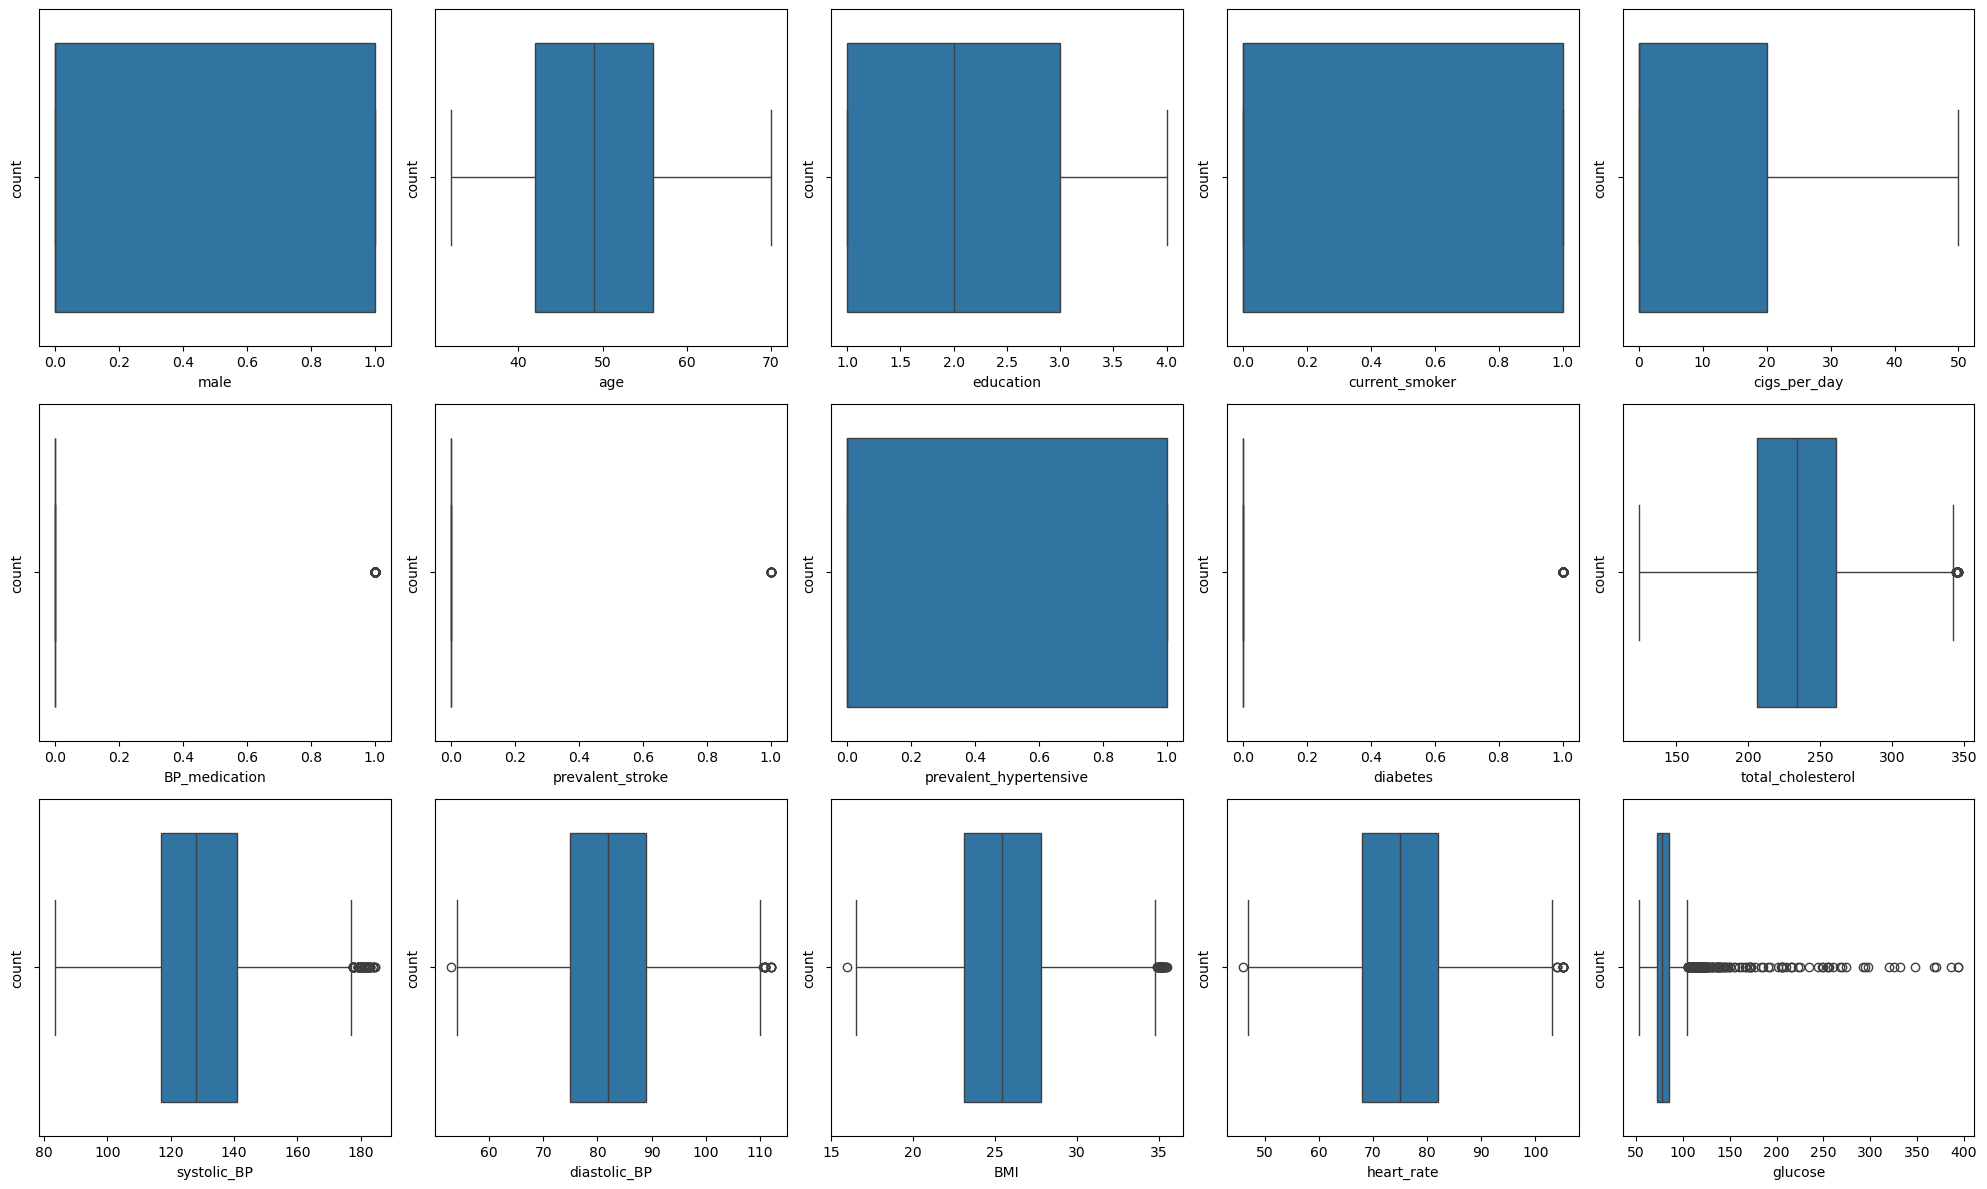

In [62]:
plt.figure(figsize=(20,12), facecolor='white')
plotnumber = 1

for column in data.drop('TenYearCHD', axis=1):
    if plotnumber <= 15:
        ax = plt.subplot(3,5, plotnumber)
        sns.boxplot(x=data[column])

        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [63]:
# 4) Scaling Data / Normalization / Standardization
data.head(5)

,male,age,education,current_smoker,cigs_per_day,BP_medication,prevalent_stroke,prevalent_hypertensive,diabetes,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [64]:
data.columns

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day',
       'BP_medication', 'prevalent_stroke', 'prevalent_hypertensive',
       'diabetes', 'total_cholesterol', 'systolic_BP', 'diastolic_BP', 'BMI',
       'heart_rate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df = ['male', 'education', 'current_smoker', 'prevalent_stroke', 'prevalent_hypertensive', 'diabetes', 'TenYearCHD']
dt = scaling.fit_transform(data.drop(df, axis=1))

In [66]:
dt

array([[0.18421053, 0.        , 0.        , ..., 0.56490508, 0.57627119,
        0.07038123],
       [0.36842105, 0.        , 0.        , ..., 0.6552078 , 0.83050847,
        0.06744868],
       [0.42105263, 0.4       , 0.        , ..., 0.48127245, 0.49152542,
        0.04985337],
       ...,
       [0.42105263, 0.4       , 0.        , ..., 0.30990251, 0.6440678 ,
        0.09677419],
       [0.31578947, 0.3       , 0.        , ..., 0.16418676, 0.6779661 ,
        0.07331378],
       [0.52631579, 0.        , 0.        , ..., 0.28270908, 0.57627119,
        0.15835777]])

convert this array into a dataframe

In [67]:
data_scaled = pd.DataFrame(dt, 
columns=['age','cigs_per_day', 'BP_medication', 'total_cholesterol', 'systolic_BP', 'diastolic_BP', 'BMI', 'heart_rate', 'glucose'])

data_scaled

,age,cigs_per_day,BP_medication,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose
0,0.184211,0.00,0.0,0.319820,0.222772,0.288136,0.564905,0.576271,0.070381
1,0.368421,0.00,0.0,0.567568,0.371287,0.474576,0.655208,0.830508,0.067449
2,0.421053,0.40,0.0,0.545045,0.435644,0.457627,0.481272,0.491525,0.049853
3,0.763158,0.60,0.0,0.454955,0.658416,0.711864,0.647512,0.322034,0.146628
4,0.368421,0.46,0.0,0.725225,0.460396,0.525424,0.366342,0.661017,0.093842
...,...,...,...,...,...,...,...,...,...
4233,0.473684,0.02,0.0,0.851351,0.945545,0.661017,0.513597,0.338983,0.096774
4234,0.500000,0.86,0.0,0.373874,0.425743,0.457627,0.192406,0.322034,0.043988
4235,0.421053,0.40,0.0,0.558559,0.470297,0.322034,0.309903,0.644068,0.096774
4236,0.315789,0.30,0.0,0.387387,0.425743,0.576271,0.164187,0.677966,0.073314


In [68]:
df1 = data[['male', 'education', 'current_smoker', 'prevalent_stroke', 'prevalent_hypertensive', 'diabetes', 'TenYearCHD']]

In [69]:
data_processed = pd.concat([data_scaled, df1], axis=1)
data_processed

,age,cigs_per_day,BP_medication,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose,male,education,current_smoker,prevalent_stroke,prevalent_hypertensive,diabetes,TenYearCHD
0,0.184211,0.00,0.0,0.319820,0.222772,0.288136,0.564905,0.576271,0.070381,1,4.0,0,0,0,0,0
1,0.368421,0.00,0.0,0.567568,0.371287,0.474576,0.655208,0.830508,0.067449,0,2.0,0,0,0,0,0
2,0.421053,0.40,0.0,0.545045,0.435644,0.457627,0.481272,0.491525,0.049853,1,1.0,1,0,0,0,0
3,0.763158,0.60,0.0,0.454955,0.658416,0.711864,0.647512,0.322034,0.146628,0,3.0,1,0,1,0,1
4,0.368421,0.46,0.0,0.725225,0.460396,0.525424,0.366342,0.661017,0.093842,0,3.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.473684,0.02,0.0,0.851351,0.945545,0.661017,0.513597,0.338983,0.096774,1,1.0,1,0,1,0,1
4234,0.500000,0.86,0.0,0.373874,0.425743,0.457627,0.192406,0.322034,0.043988,1,3.0,1,0,0,0,0
4235,0.421053,0.40,0.0,0.558559,0.470297,0.322034,0.309903,0.644068,0.096774,0,2.0,1,0,0,0,0
4236,0.315789,0.30,0.0,0.387387,0.425743,0.576271,0.164187,0.677966,0.073314,0,1.0,1,0,0,0,0


In [70]:
data_processed.to_csv('processed_framingham.csv', index=False)

# Feature Engineering/Selection

In [71]:
# 1) Drop the columns which has very less correlation with target variables
data_processed.corr()

,age,cigs_per_day,BP_medication,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose,male,education,current_smoker,prevalent_stroke,prevalent_hypertensive,diabetes,TenYearCHD
age,1.000000,-0.197155,0.120955,0.265774,0.352791,0.195676,0.128301,-0.017565,0.118711,-0.028979,-0.163547,-0.213748,0.057655,0.307194,0.101258,0.225256
cigs_per_day,-0.197155,1.000000,-0.043317,-0.027358,-0.072587,-0.054150,-0.086873,0.079247,-0.055839,0.307125,0.010963,0.766011,-0.031982,-0.070495,-0.034724,0.059956
BP_medication,0.120955,-0.043317,1.000000,0.070193,0.184606,0.154141,0.072144,-0.007384,0.048348,-0.051545,-0.010365,-0.048358,0.114609,0.258697,0.051394,0.086417
total_cholesterol,0.265774,-0.027358,0.070193,1.000000,0.184240,0.176438,0.147064,0.070038,0.034529,-0.058969,-0.019901,-0.051599,0.013373,0.148315,0.027668,0.073375
systolic_BP,0.352791,-0.072587,0.184606,0.184240,1.000000,0.709059,0.271902,0.144855,0.073546,0.005850,-0.115936,-0.117520,0.055625,0.668769,0.061619,0.172217
diastolic_BP,0.195676,-0.054150,0.154141,0.176438,0.709059,1.000000,0.318797,0.160764,0.050552,0.073961,-0.063475,-0.105940,0.055504,0.591229,0.044388,0.112787
BMI,0.128301,-0.086873,0.072144,0.147064,0.271902,0.318797,1.000000,0.040217,0.057765,0.144096,-0.111772,-0.164936,0.000355,0.252630,0.053710,0.061241
heart_rate,-0.017565,0.079247,-0.007384,0.070038,0.144855,0.160764,0.040217,1.000000,0.078000,-0.109487,-0.047069,0.071520,-0.015018,0.133507,0.039252,0.014496
glucose,0.118711,-0.055839,0.048348,0.034529,0.073546,0.050552,0.057765,0.078000,1.000000,0.011201,-0.036456,-0.055389,0.018362,0.085769,0.610661,0.122255
male,-0.028979,0.307125,-0.051545,-0.058969,0.005850,0.073961,0.144096,-0.109487,0.011201,1.000000,0.017205,0.197596,-0.004546,0.005313,0.015708,0.088428


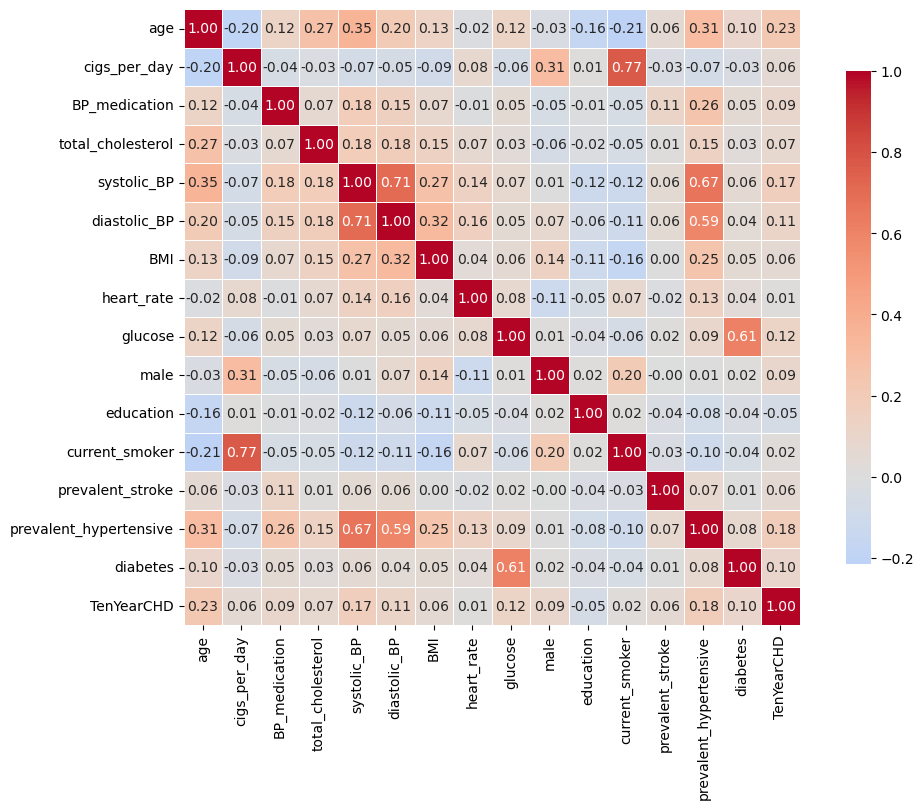

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(data_processed.corr(),
            annot=True,          # show numbers
            fmt=".2f",           # format numbers to 2 decimal places
            cmap="coolwarm",     # better diverging colormap
            center=0,            # center colormap at 0
            square=True,         # make cells square
            linewidths=0.5,      # add space between cells
            cbar_kws={"shrink": 0.8})  # shrink colorbar
plt.show()

Education doesn’t add much predictive value and could be dropped.

In [73]:
data_processed.drop('education', axis=1, inplace=True)
data_processed.head()

,age,cigs_per_day,BP_medication,total_cholesterol,systolic_BP,diastolic_BP,BMI,heart_rate,glucose,male,current_smoker,prevalent_stroke,prevalent_hypertensive,diabetes,TenYearCHD
0,0.184211,0.00,0.0,0.319820,0.222772,0.288136,0.564905,0.576271,0.070381,1,0,0,0,0,0
1,0.368421,0.00,0.0,0.567568,0.371287,0.474576,0.655208,0.830508,0.067449,0,0,0,0,0,0
2,0.421053,0.40,0.0,0.545045,0.435644,0.457627,0.481272,0.491525,0.049853,1,1,0,0,0,0
3,0.763158,0.60,0.0,0.454955,0.658416,0.711864,0.647512,0.322034,0.146628,0,1,0,1,0,1
4,0.368421,0.46,0.0,0.725225,0.460396,0.525424,0.366342,0.661017,0.093842,0,1,0,0,0,0


In [74]:
# 2) Drop one of the column if two input variables has high correlation

* Current_Smoker & Cigs_per_day → correlation = 0.77 → very high.
  - Keep Cigs_per_day (numeric info) and drop Current_Smoker (binary).
* Systolic_BP & Diastolic_BP → correlation = 0.71 → fairly high.
  - Keep Systolic_BP (more clinically relevant) and drop Diastolic_BP.
* Glucose & Diabetes → correlation ≈ 0.61 → moderately high.
  - Better to keep Glucose (continuous info is richer) and drop Diabetes (binary).

In [75]:
data_processed.drop(['current_smoker', 'diastolic_BP', 'diabetes'], axis=1, inplace=True)
data_processed.head()

,age,cigs_per_day,BP_medication,total_cholesterol,systolic_BP,BMI,heart_rate,glucose,male,prevalent_stroke,prevalent_hypertensive,TenYearCHD
0,0.184211,0.00,0.0,0.319820,0.222772,0.564905,0.576271,0.070381,1,0,0,0
1,0.368421,0.00,0.0,0.567568,0.371287,0.655208,0.830508,0.067449,0,0,0,0
2,0.421053,0.40,0.0,0.545045,0.435644,0.481272,0.491525,0.049853,1,0,0,0
3,0.763158,0.60,0.0,0.454955,0.658416,0.647512,0.322034,0.146628,0,0,1,1
4,0.368421,0.46,0.0,0.725225,0.460396,0.366342,0.661017,0.093842,0,0,0,0


# Split Data into x and y

In [76]:
x = data_processed.drop('TenYearCHD', axis=1)
y = data_processed.TenYearCHD

# Split Data for training and testing

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [78]:
x_train.shape

(2966, 11)

In [79]:
x_test.shape

(1272, 11)

# Model Building

In [80]:
# 1) Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# 2) Initialize model
model = LogisticRegression()

# 3) Train model with x_train and y_train
model.fit(x_train, y_train)

LogisticRegression()

In [81]:
# 4) make predictions/test model
y_pred = model.predict(x_test)

# Evaluate the Model

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [83]:
confusion_matrix(y_test, y_pred)

array([[1078,    6],
       [ 177,   11]], dtype=int64)

In [84]:
accuracy_score(y_test, y_pred)

0.8561320754716981

In [85]:
precision_score(y_test, y_pred)

0.6470588235294118

In [86]:
recall_score(y_test, y_pred)

0.05851063829787234

In [87]:
f1_score(y_test, y_pred)

0.1073170731707317

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.65      0.06      0.11       188

    accuracy                           0.86      1272
   macro avg       0.75      0.53      0.51      1272
weighted avg       0.83      0.86      0.80      1272



# Handle Imbalanced Data

### a) Resampling Techniques:

In [90]:
y_train.value_counts()

TenYearCHD
0    2510
1     456
Name: count, dtype: int64

In [91]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_train.astype('float'), y_train)

In [92]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_res))

Actual Classes Counter({0: 2510, 1: 456})
SMOTE Classes Counter({0: 2510, 1: 2510})


In [93]:
model_2 = LogisticRegression()
model_2.fit(x_res, y_res)

LogisticRegression()

In [94]:
y_pred_2 = model_2.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1084
           1       0.25      0.68      0.36       188

    accuracy                           0.65      1272
   macro avg       0.59      0.66      0.56      1272
weighted avg       0.82      0.65      0.70      1272



### b) Use Class Weights:

In [96]:
model_3 = LogisticRegression(class_weight='balanced')
model_3.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [97]:
y_pred_3 = model_3.predict(x_test)

In [98]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.92      0.65      0.77      1084
           1       0.25      0.68      0.37       188

    accuracy                           0.66      1272
   macro avg       0.59      0.67      0.57      1272
weighted avg       0.82      0.66      0.71      1272



In [101]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thersholds = roc_curve(y_test, y_pred_3)
roc_auc_score = auc(false_positive_rate, true_positive_rate)
print(roc_auc_score)

0.6674550522100966
